In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

In [207]:
sns.set(font_scale=2)  # big
# sns.set_context("poster")
sns.set_style("whitegrid")

In [3]:
%%bash
ls exp/

AsteroidsNoFrameskip-v4-cnn
AsteroidsNoFrameskip-v4-lstm
BeamRiderNoFrameskip-v4-cnn
BeamRiderNoFrameskip-v4-lstm
BowlingNoFrameskip-v4-cnn
BowlingNoFrameskip-v4-lstm
DoubleDunkNoFrameskip-v4-cnn
DoubleDunkNoFrameskip-v4-lstm
FrostbiteNoFrameskip-v4-cnn
FrostbiteNoFrameskip-v4-lstm
pong_dqn_cnn
PongNoFrameskip-v4-cnn
PongNoFrameskip-v4-lstm
tb-pong-dqn-cnn


In [338]:
def load_monitor(env='AsteroidsNoFrameskip-v4', policy='lstm', workers=4, nlstm=None, dir_root='exp', sigma=None):
    dfs = pd.DataFrame()
    for worker in range(workers):
        if policy == 'lstm' and nlstm is not None:
            fname='{}/{}-{}-nlstm{}/{}.monitor.csv'.format(dir_root, env, policy, nlstm, worker)
        elif sigma is not None:
            fname='{}/{}-{}-sigma{}/{}.monitor.csv'.format(dir_root, env, policy, sigma, worker)
        else:
            fname='{}/{}-{}/{}.monitor.csv'.format(dir_root, env, policy, worker)
        df = pd.read_csv(fname, header=1)
        if 'i' not in df.columns:
            df['i'] = np.cumsum(df['l'])-1
        dfs = pd.concat([dfs, df])
        dfs['policy'] = 'A2C' if policy == 'cnn' else 'RA2C'
        if nlstm is not None:
            dfs['nlstm'] = nlstm
        elif sigma is not None:
            dfs['sigma'] = sigma
    return dfs 

In [259]:
def plot_learning_curve(dfs, step=50000, figsize=(10,6), condition='policy', ax=None):
    n_cond = len(dfs[condition].unique())
    colors = sns.color_palette("husl", n_cond)
    for c, (cond, df_c) in enumerate(dfs.groupby(condition, sort=False)):
        grouped = df_c.groupby(lambda x: int(df_c.iloc[x].i/step) )
        agg=grouped['r'].agg([np.mean, np.std])
        time = agg.index*step
        mean = agg['mean']
        std = agg['std']
    
        plt.figure(figsize=figsize)
        color = colors[c] # get current color
        ax = sns.tsplot(data=mean, time=time, ax=ax, color=color, condition=cond, legend=True)
        ax.fill_between(time, mean-std, mean+std, alpha=0.2, color=color)
    
    ax.set_ylabel('reward')
    ax.set_xlabel('frame')
    return ax

# Global parameters

In [261]:
workers=4

/data/apps/anaconda3/envs/10703/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


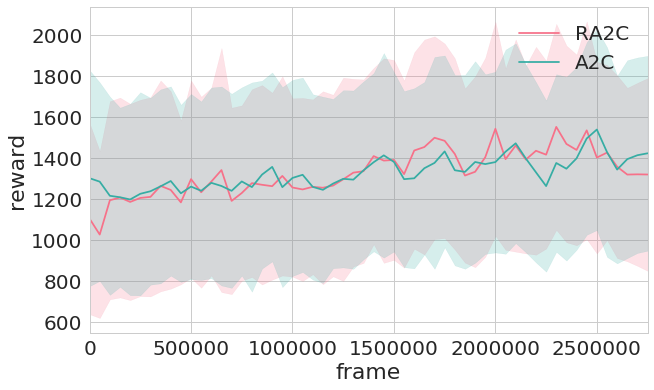

<Figure size 720x432 with 0 Axes>

In [287]:
env='AsteroidsNoFrameskip-v4'

df1 = load_monitor(env, 'lstm', workers)
df2 = load_monitor(env, 'cnn', workers)
ax = plot_learning_curve(pd.concat([df1, df2]))

/data/apps/anaconda3/envs/10703/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


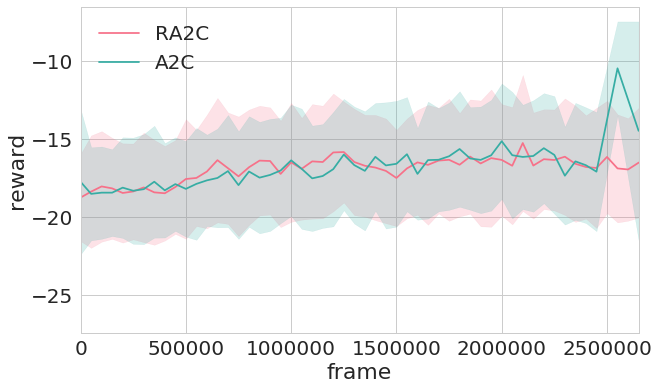

<Figure size 720x432 with 0 Axes>

In [337]:
env='DoubleDunkNoFrameskip-v4'

df1 = load_monitor(env, 'lstm', workers)
df2 = load_monitor(env, 'cnn', workers)
ax = plot_learning_curve(pd.concat([df1, df2]))

/data/apps/anaconda3/envs/10703/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


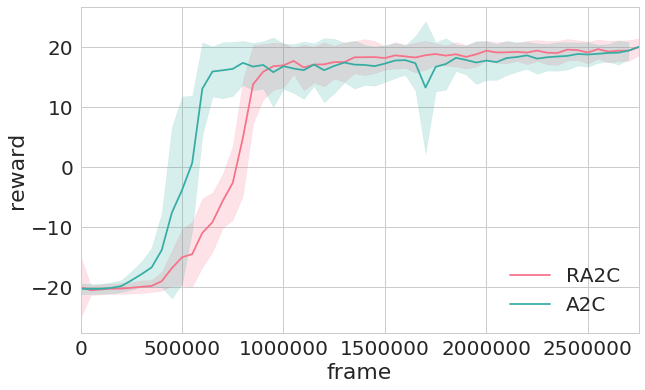

<Figure size 720x432 with 0 Axes>

In [289]:
env='PongNoFrameskip-v4'

df1 = load_monitor(env, 'lstm', workers)
df2 = load_monitor(env, 'cnn', workers)
ax = plot_learning_curve(pd.concat([df1, df2]))

/data/apps/anaconda3/envs/10703/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


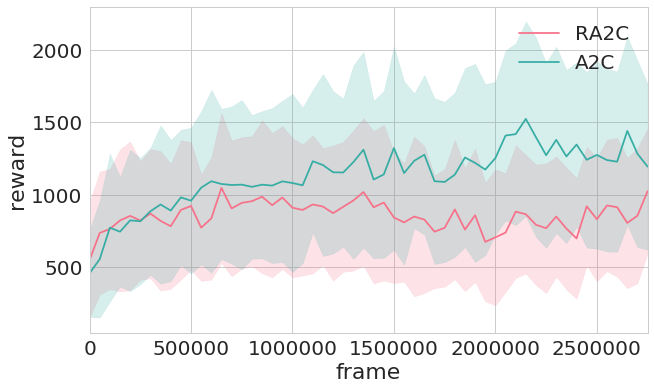

<Figure size 720x432 with 0 Axes>

In [290]:
env='MsPacmanNoFrameskip-v4'

df1 = load_monitor(env, 'lstm', workers)
df2 = load_monitor(env, 'cnn', workers)
ax = plot_learning_curve(pd.concat([df1, df2]))

/data/apps/anaconda3/envs/10703/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


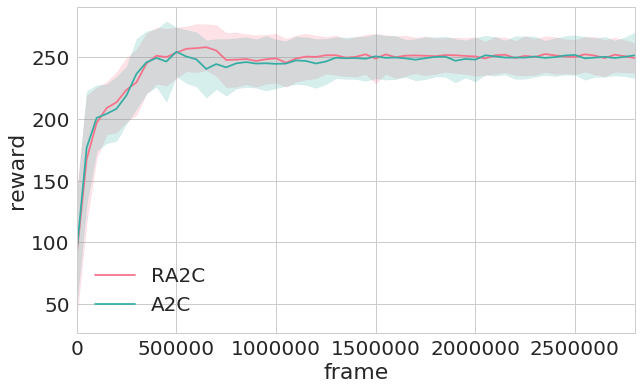

<Figure size 720x432 with 0 Axes>

In [334]:
env='FrostbiteNoFrameskip-v4'

df1 = load_monitor(env, 'lstm', workers)
df2 = load_monitor(env, 'cnn', workers)
ax = plot_learning_curve(pd.concat([df1, df2]))

/data/apps/anaconda3/envs/10703/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


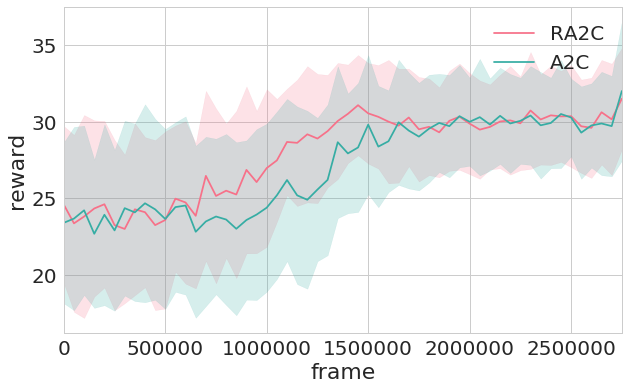

<Figure size 720x432 with 0 Axes>

In [333]:
env='BowlingNoFrameskip-v4'

df1 = load_monitor(env, 'lstm', workers)
df2 = load_monitor(env, 'cnn', workers)
ax = plot_learning_curve(pd.concat([df1, df2]))

/data/apps/anaconda3/envs/10703/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


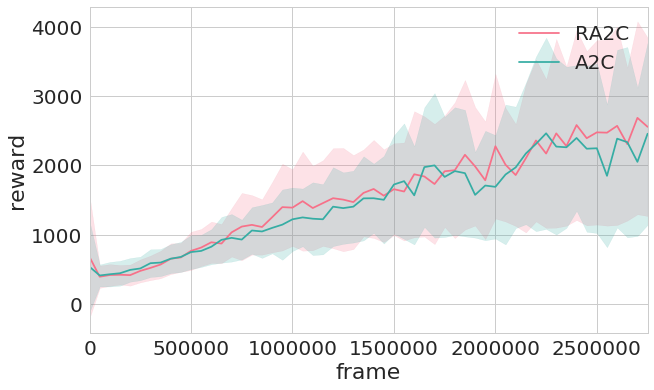

<Figure size 720x432 with 0 Axes>

In [335]:
env='BeamRiderNoFrameskip-v4'

df1 = load_monitor(env, 'lstm', workers)
df2 = load_monitor(env, 'cnn', workers)
ax = plot_learning_curve(pd.concat([df1, df2]))

# mean and std of the last N iterations

In [332]:
envs = ['AsteroidsNoFrameskip-v4',
        'BeamRiderNoFrameskip-v4',
        'BowlingNoFrameskip-v4',
        'DoubleDunkNoFrameskip-v4',
        'FrostbiteNoFrameskip-v4',
        'MsPacmanNoFrameskip-v4',
        'PongNoFrameskip-v4']
last_n = 20
df = pd.DataFrame()
for env in envs:
    df1 = load_monitor(env, 'lstm', workers)
    df2 = load_monitor(env, 'cnn', workers)
    top_r1 = df1.sort_values(by='i')[-last_n:]
    top_r2 = df2.sort_values(by='i')[-last_n:]
    dicts={'env': env, 'a2c-mean': top_r1['r'].mean(), 'a2c-std': top_r1['r'].std(),
              'ra2c-mean': top_r2['r'].mean(), 'ra2c-std': top_r2['r'].std()}
    df = df.append(dicts, ignore_index=True)
df

,a2c-mean,a2c-std,env,ra2c-mean,ra2c-std
0,1247.0,330.344318,AsteroidsNoFrameskip-v4,1591.50,498.326410
1,2442.5,1452.475328,BeamRiderNoFrameskip-v4,2313.10,1424.041317
2,30.2,2.706717,BowlingNoFrameskip-v4,30.85,3.248886
3,-15.5,3.605551,DoubleDunkNoFrameskip-v4,-11.60,6.730918
4,248.5,10.894228,FrostbiteNoFrameskip-v4,248.50,17.851729
5,1226.0,413.348330,MsPacmanNoFrameskip-v4,1295.50,645.457610
6,19.1,1.483240,PongNoFrameskip-v4,19.65,1.308877


# Convergence rate of different LSTM units

/data/apps/anaconda3/envs/10703/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


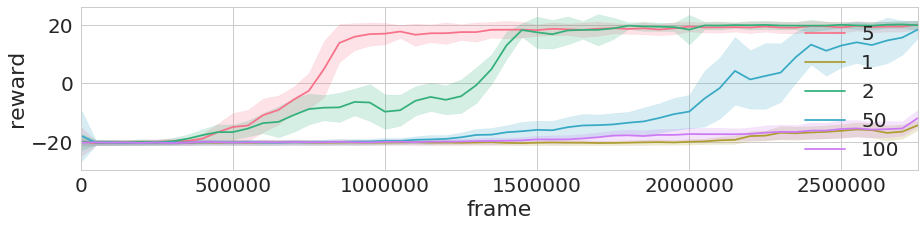

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

In [320]:
env='PongNoFrameskip-v4'

#nlstm = 5 (default)
dfs=load_monitor(env, 'lstm', workers)
dfs['nlstm']=5

for i in [1,2,50,100]:
    df=load_monitor(env, 'lstm', workers, nlstm=i)
    dfs=pd.concat([dfs, df])

plot_learning_curve(dfs, condition='nlstm', figsize=(15,3))

# Rewards on POMDP games

In [336]:
envs = ['AsteroidsNoFrameskip-v4',
        'BeamRiderNoFrameskip-v4',
        'BowlingNoFrameskip-v4',
        'DoubleDunkNoFrameskip-v4',
        'FrostbiteNoFrameskip-v4',
        'MsPacmanNoFrameskip-v4']
df = pd.DataFrame()
for env in envs:
    df1 = load_monitor(env, 'lstm', workers, dir_root='tests')
    df2 = load_monitor(env, 'cnn', workers, dir_root='tests')
    top_r1 = df1.sort_values(by='i')
    top_r2 = df2.sort_values(by='i')
    dicts={'env': env, 'ra2c-mean': top_r1['r'].mean(), 'ra2c-std': top_r1['r'].std(),
              'a2c-mean': top_r2['r'].mean(), 'a2c-std': top_r2['r'].std()}
    df = df.append(dicts, ignore_index=True)
df

,a2c-mean,a2c-std,env,ra2c-mean,ra2c-std
0,837.797619,298.090581,AsteroidsNoFrameskip-v4,850.490798,337.675064
1,1080.142857,456.230222,BeamRiderNoFrameskip-v4,1300.627451,505.981105
2,29.204545,5.376865,BowlingNoFrameskip-v4,30.727273,5.068662
3,NaN,NaN,DoubleDunkNoFrameskip-v4,-19.511111,2.528225
4,188.084112,42.432741,FrostbiteNoFrameskip-v4,195.428571,44.625578
5,1433.259259,553.191324,MsPacmanNoFrameskip-v4,1022.569444,458.374670


# Robustness of RA2C

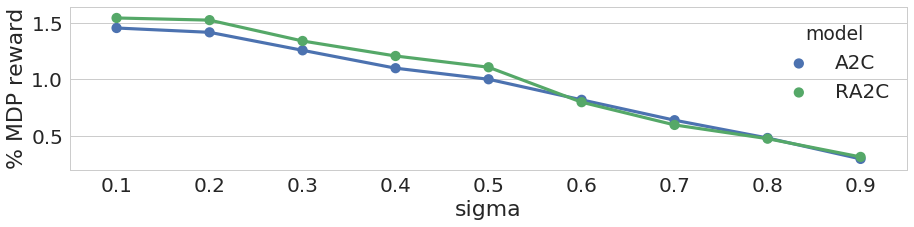

In [366]:
env = 'AsteroidsNoFrameskip-v4'
df_lstm_baseline = load_monitor(env, 'lstm', workers, dir_root='tests')
df_cnn_baseline  = load_monitor(env, 'cnn',  workers, dir_root='tests')
y_label='% MDP reward'
df = pd.DataFrame()
for sigma in range(1, 10):
    sigma /= 10.0
    df_lstm = load_monitor(env, 'lstm', workers, dir_root='tests', sigma=sigma)
    df_cnn  = load_monitor(env, 'cnn',  workers, dir_root='tests', sigma=sigma)

    dicts_lstm={'env': env, 'sigma': sigma, 'model':'A2C', 
                y_label: df_lstm['r'].mean()/df_lstm_baseline['r'].mean()}
    dicts_cnn={'env': env, 'sigma': sigma, 'model':'RA2C',
                y_label: df_cnn['r'].mean()/df_cnn_baseline['r'].mean()}
    df = df.append(dicts_lstm, ignore_index=True)
    df = df.append(dicts_cnn, ignore_index=True)
plt.figure(figsize=(15,3))
ax = sns.pointplot(x="sigma", y=y_label, hue="model", data=df)